In [ ]:
import tensorflow as tf 

In [ ]:
# Here we're inporting the MNIST dataset under the Keras API. The Keras Python library makes creating deep learning model a quick process
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt 

3


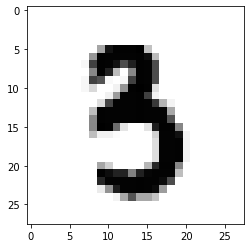

In [ ]:
# We're going to display an image below with Matplotlib.
 
image_index = 45786 # You may select any number up to 60,000 here
print(y_train[image_index]) # This line will tell us what label the image has. This is import as we need to check how accurate our models are!
plt.imshow(x_train[image_index], cmap='Greys') # Here we can choose how we want to import the image. Right now, it is set to import in greyscale

In [ ]:
# We're going to check how many examples are in our dataset. The first number will tell us how many images are in the training dataset. The second and third number tell us the sizes of those images.
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4 dimensions so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [ ]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
# Below we are using the "Adam" optimizer. This updates network weights iteratively based on training data.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # We can print the accuracy and loss with these lines of code
model.fit(x=x_train,y=y_train, epochs=50) # An epoch is generally defined as "one pass over the entire dataset"

Epoch 1/50
60000/60000 [==============================] - 34s 569us/step - loss: 0.2076 - accuracy: 0.9384
Epoch 2/50
60000/60000 [==============================] - 34s 567us/step - loss: 0.0874 - accuracy: 0.9732
Epoch 3/50
60000/60000 [==============================] - 34s 569us/step - loss: 0.0620 - accuracy: 0.9806
Epoch 4/50
60000/60000 [==============================] - 34s 568us/step - loss: 0.0453 - accuracy: 0.9855
Epoch 5/50
60000/60000 [==============================] - 34s 568us/step - loss: 0.0369 - accuracy: 0.9877
Epoch 6/50
60000/60000 [==============================] - 34s 566us/step - loss: 0.0309 - accuracy: 0.9897
Epoch 7/50
60000/60000 [==============================] - 34s 561us/step - loss: 0.0265 - accuracy: 0.9907
Epoch 8/50
60000/60000 [==============================] - 34s 567us/step - loss: 0.0228 - accuracy: 0.9921
Epoch 9/50
60000/60000 [==============================] - 34s 566us/step - loss: 0.0220 - accuracy: 0.9926
Epoch 10/50
60000/60000 [============

In [ ]:
# If we want to see our prediction results and confidence score, we can go ahead and run this line of code
model.evaluate(x_test, y_test)

8


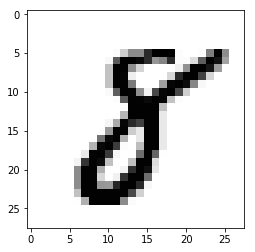

In [ ]:
from random import randint

image_index = (randint(0, 10000)) # Choose any number less than 60,000 here so we can test our model!
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys') # Just like a previous line we write above. Displays the image on a graph in greyscale
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1)) # Here we'll display the prediction with our image
print(pred.argmax())